#### Importing Libraries

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score,roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Importing Dataset

In [115]:
avoc=pd.read_csv('avocado.csv')

In [116]:
avoc.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Getting complete information of the data

In [117]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


#### Printing column names

In [118]:
avoc.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Printing keys in the dataset

In [119]:
avoc.keys()

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

#### Checking the shape of the data

In [120]:
avoc.shape

(18249, 14)

#### Checking datatype of each column in the dataset

In [121]:
avoc.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

#### Checking for the null values

In [122]:
avoc.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18245,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18246,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18247,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Checking number of null values in the dataset

In [123]:
avoc.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### Describing the complete data

In [124]:
avoc.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


#### Converting date object into Datetime object

In [125]:
avoc['Date']=pd.to_datetime(avoc['Date'])

In [126]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


#### Plotting the heatmap

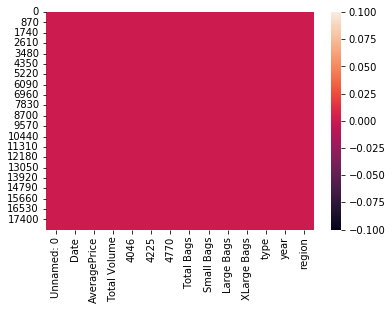

In [127]:
sns.heatmap(avoc.isnull())

#### Drawing the heatmap

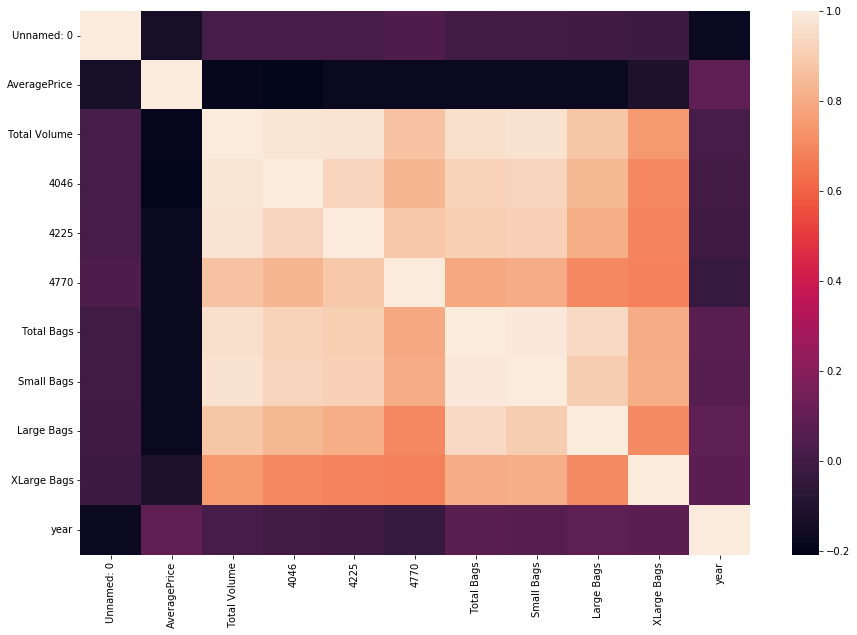

In [128]:
plt.figure(figsize=(15,10))
sns.heatmap(avoc.corr())

#### Plotting the graph showing Price of Avocado in different regions

Text(0.5, 1.0, 'Average Price According to Region')

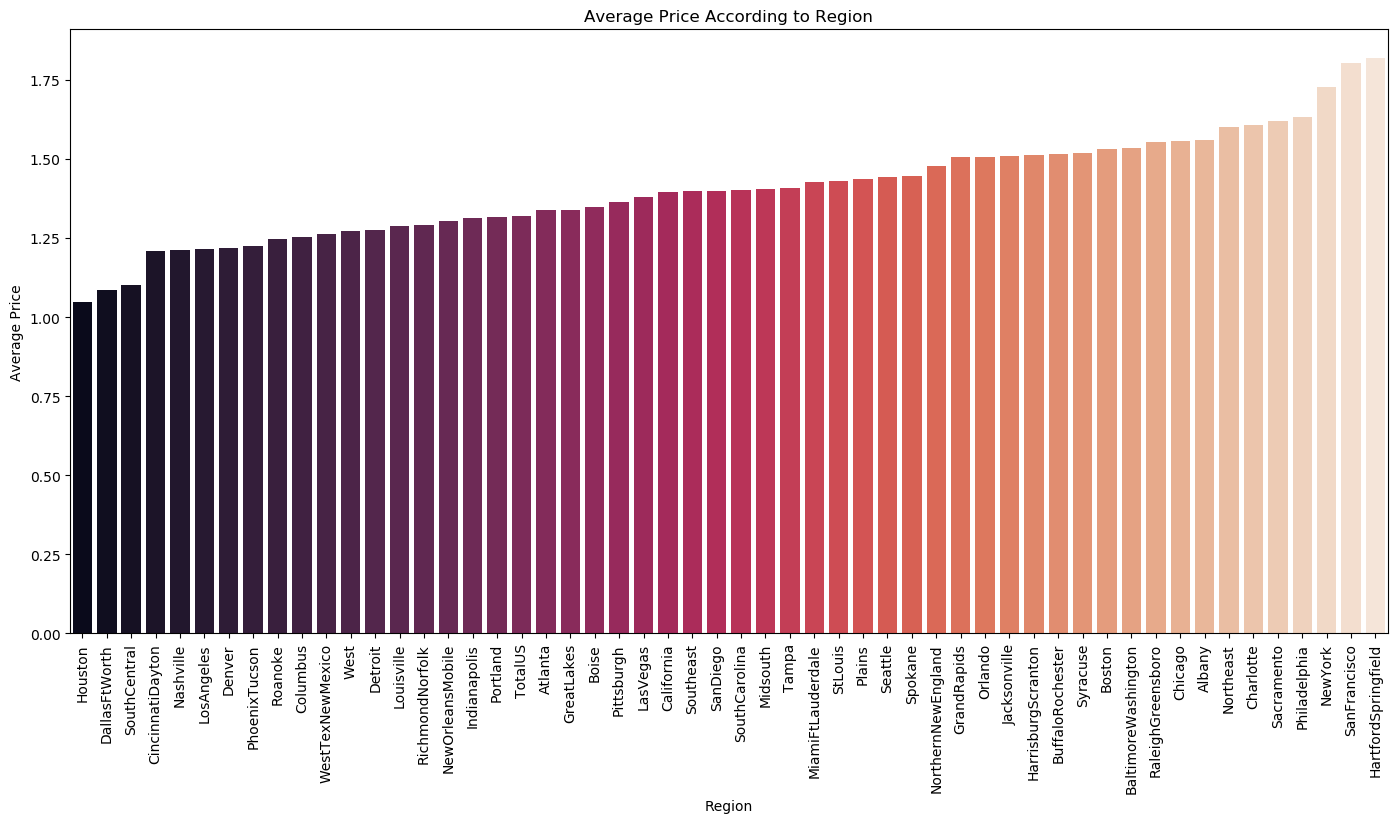

In [129]:
region=avoc.groupby('region').mean()
region.sort_values(by=['AveragePrice'], ascending=True, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = region.index,y=region["AveragePrice"],data = region,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

#### Plotting the Average Price wrto Date

Text(0.5, 1.0, 'Average Price According to Date')

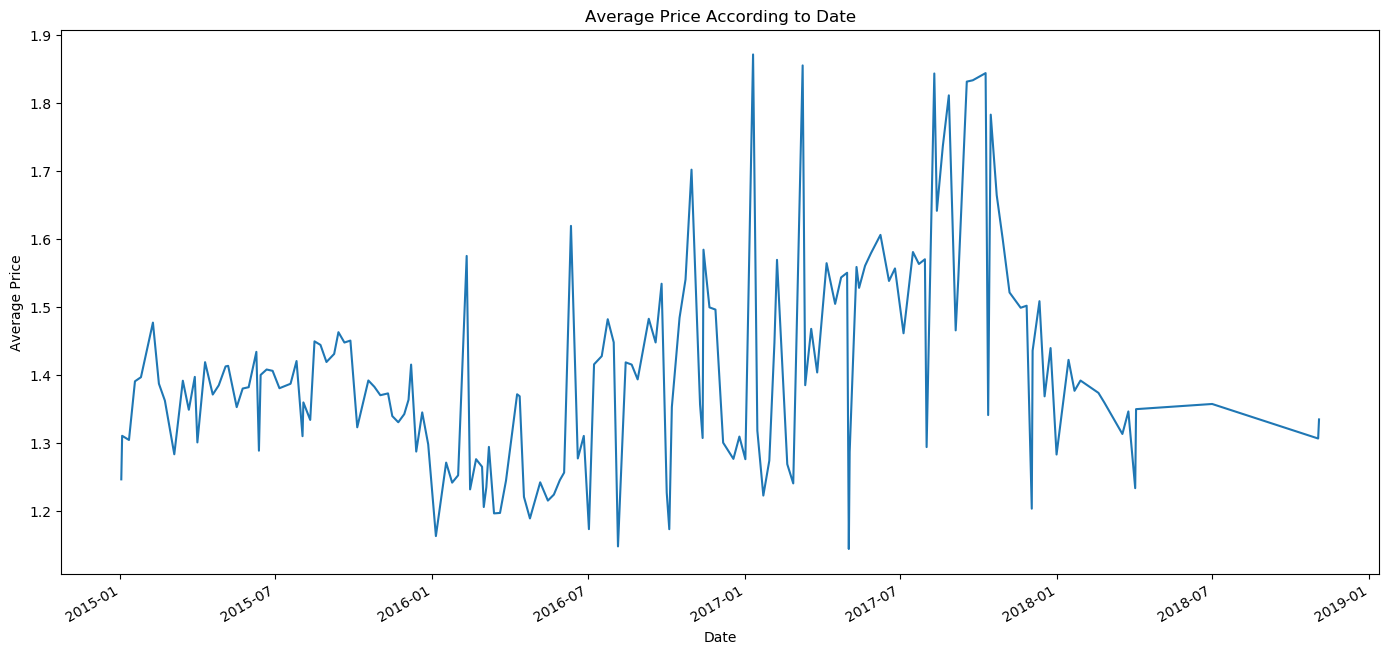

In [130]:
date=avoc.groupby('Date').mean()
plt.figure(figsize=(17,8),dpi=100)
date['AveragePrice'].plot()
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price According to Date')

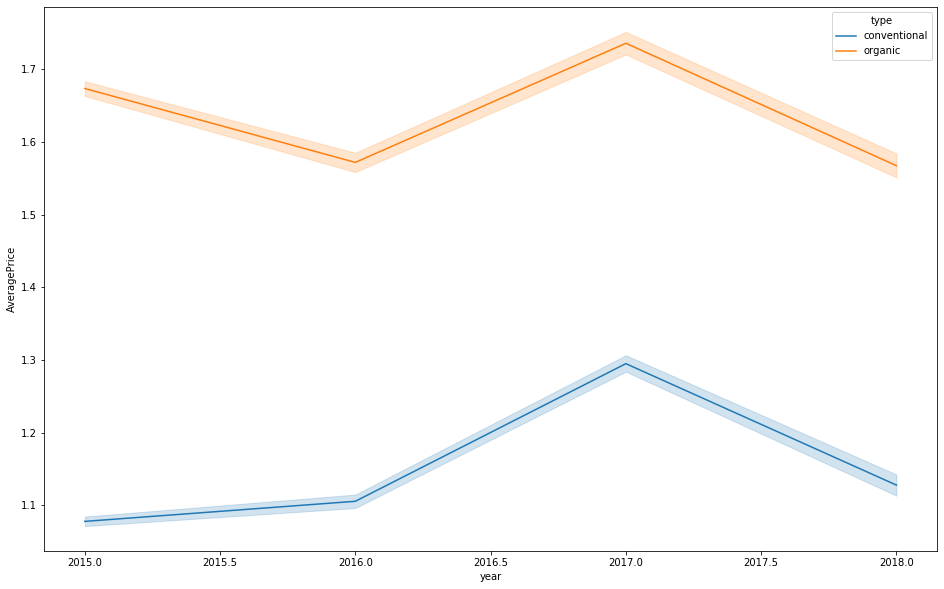

In [131]:
plt.figure(figsize=(16,10))
sns.lineplot(x='year',y='AveragePrice', hue='type',data=avoc)

#### Checking for skewness of the data

In [132]:
avoc.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

#### Checking for an outlier

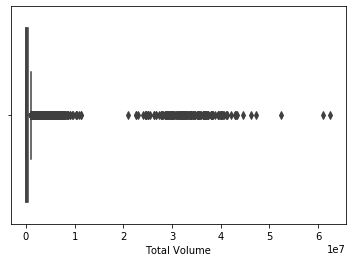

In [133]:
sns.boxplot(avoc['Total Volume'])

In [134]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


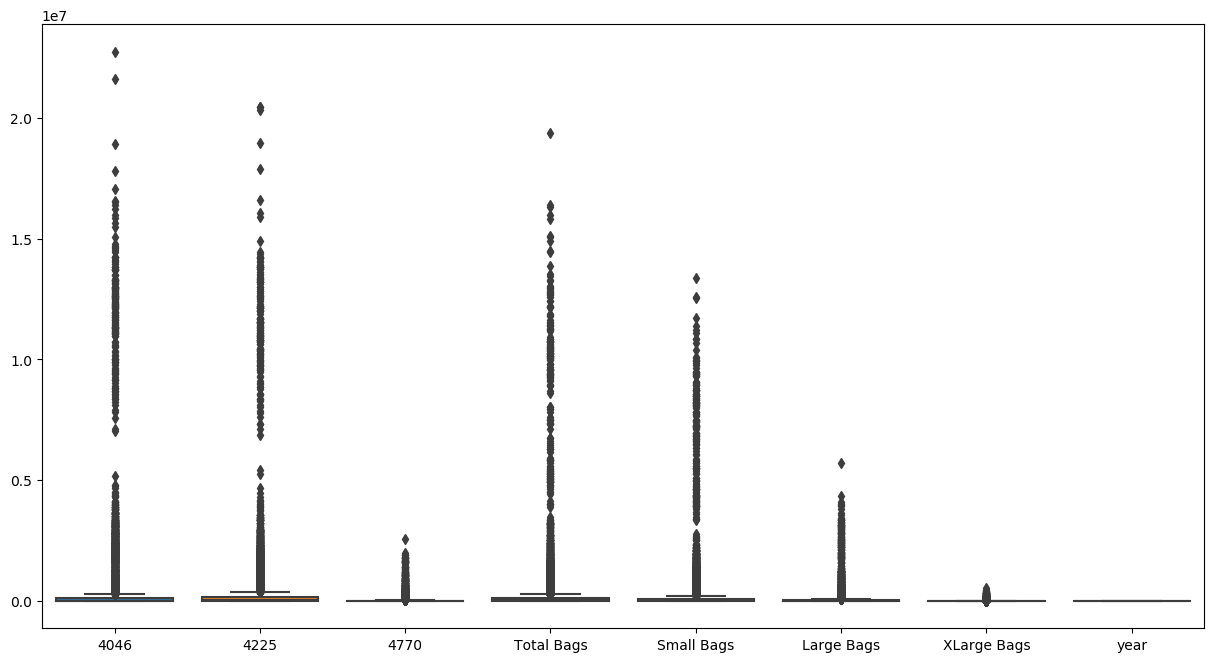

In [135]:
plt.figure(figsize=(15,8),dpi=100)
sns.boxplot(data = avoc[['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']])

In [136]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


#### Dropping the unused columns

In [137]:
avoc.drop(columns=["Date",'type','Unnamed: 0'],inplace=True)

In [138]:
avoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   year          18249 non-null  int64  
 10  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.5+ MB


#### Convert str values to int

In [139]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
avoc = avoc.apply(label_encoder.fit_transform)

#### Removing the outliers

In [140]:
## Calculate the z-score

from scipy.stats import zscore
z=np.abs(zscore(avoc))
print(z)

[[0.18868869 0.22480975 0.80622027 ... 0.56922758 1.22128204 1.7002522 ]
 [0.13900282 0.27912775 0.95279724 ... 0.56922758 1.22128204 1.7002522 ]
 [1.18240612 0.0519082  0.90024357 ... 0.56922758 1.22128204 1.7002522 ]
 ...
 [1.15282984 0.74291995 0.75443101 ... 0.56922758 1.97050371 1.70081131]
 [1.30188745 0.66448171 0.65333685 ... 0.56922758 1.97050371 1.70081131]
 [0.53175644 0.63162502 0.39286172 ... 0.56922758 1.97050371 1.70081131]]


In [141]:
threshold=3
print(np.where(z<3))
print(avoc.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [142]:
## Removing outliers

avoc1=avoc[(z<3).all(axis=1)]

In [143]:
print(avoc.shape)
print(avoc1.shape)

(18249, 11)
(18118, 11)


In [144]:
avoc=avoc1
print(avoc.head)

<bound method NDFrame.head of        AveragePrice  Total Volume  4046   4225  4770  Total Bags  Small Bags  \
0                86          7931  4383  10872  1400        5780        5782   
1                88          7645  3616  10213  1570        6013        5972   
2                46          9388  3891  12864  2516        5616        5625   
3                61          8374  4545  11751  1789        4727        4880   
4                81          7540  4201  10157  1836        4874        4985   
...             ...           ...   ...    ...   ...         ...         ...   
18244           116          5729  5810   3188     0        6785        6648   
18245           124          5233  4653   4757     0        5955        5864   
18246           140          5203  4654   3928  4712        5985        5961   
18247           146          5616  5183   4402  4710        6360        6284   
18248           115          5789  6546   3853  3252        6541        6460   

       La

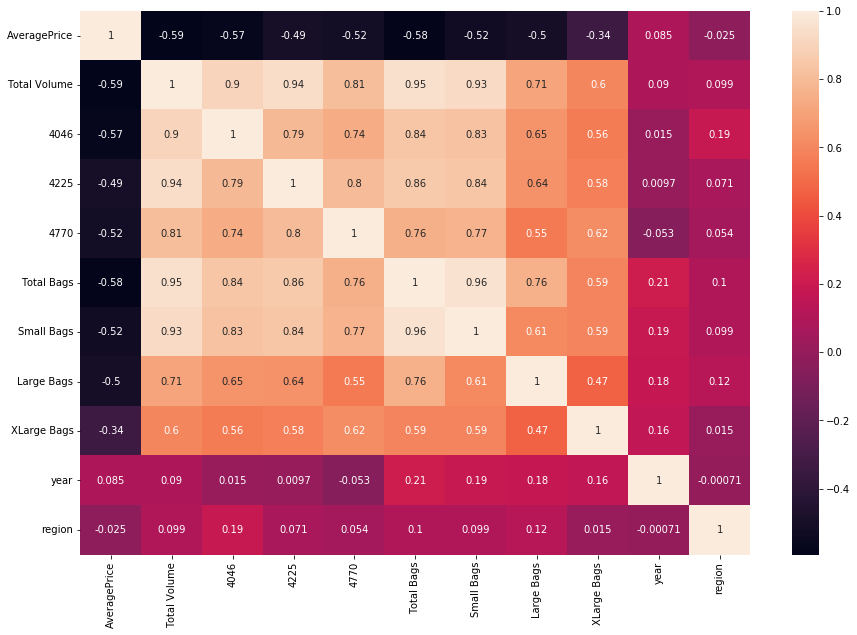

In [145]:
#### Correlation after removing outliers

plt.figure(figsize=(15,10))
sns.heatmap(avoc.corr(),annot=True)

#### Training the model

In [146]:
avoc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,3,53
18245,124,5233,4653,4757,0,5955,5864,2340,0,3,53
18246,140,5203,4654,3928,4712,5985,5961,818,0,3,53
18247,146,5616,5183,4402,4710,6360,6284,901,0,3,53


### Prediction with Average Price

In [147]:
x=avoc.iloc[:,2:]        # input variable

In [148]:
y=avoc.iloc[:,0]               # target variable

In [149]:
print(x.shape)
print(y.shape)

(18118, 9)
(18118,)


In [150]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=30)

In [151]:
print(x_train)
print(y_train)
print(x_test)
print(y_test)

        4046   4225   4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
1769    4624   9919   5082        7968        7150        8513         1500   
16169   2200   3594      0         929         182        3191            0   
8733   12390  12831   7604       14801       13298       13016         1913   
4281    9759  16695  10380       16266       15587       12498         3504   
12393   4208   8946      0        3240        3727           0            0   
...      ...    ...    ...         ...         ...         ...          ...   
500     8863  13545   8975       10585        7269       11701         3501   
12089     48   2060      0        4583        1656        7197            0   
15333   7474   1625      0        7050        6980         440            0   
4517    9505  15038   5086       14367       14238        9323            0   
5925    4656  11724   1355        9769       10258        1893            0   

       year  region  
1769      0      34  
16169  

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### 1. KNeighbors Regressor

In [153]:
model1=KNeighborsRegressor()
para={'n_neighbors':range(1,30)}
gridsearch=GridSearchCV(model1,para)
gridsearch.fit(x_train,y_train)
gridsearch.best_params_

{'n_neighbors': 4}

In [154]:
KNN=KNeighborsRegressor(n_neighbors=1)
KNN.fit(x_train,y_train)
pred=KNN.predict(x_test)
score=r2_score(y_test,pred)
print('R2 Score ',score)

R2 Score  0.6688941791058831


In [155]:
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred))

Mean Absolute Error :  14.166942604856512


Text(0, 0.5, 'Predicted Y')

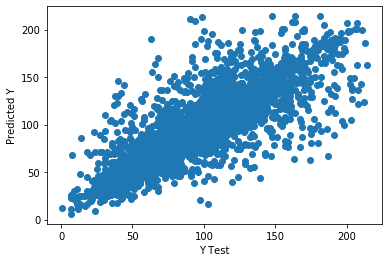

In [156]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Decision Tree Regressor

In [158]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
pred1=dtc.predict(x_test)
score=r2_score(y_test,pred1)
print('R2 Score', score)

R2 Score 0.6656939603936705


In [159]:
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred1))

Mean Absolute Error :  14.741721854304636


Text(0, 0.5, 'Predicted Y')

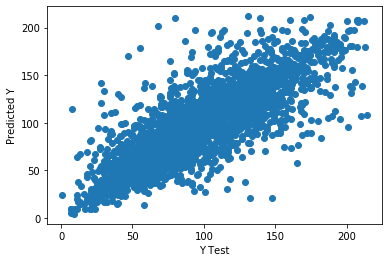

In [160]:
plt.scatter(y_test,pred1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

#### Saving the model

In [161]:
import pickle

with open('modelclass_KNN','wb') as files:
    pickle.dump(KNN, files)

## Classification with Region

In [162]:
avoc

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,86,7931,4383,10872,1400,5780,5782,1264,0,0,0
1,88,7645,3616,10213,1570,6013,5972,1288,0,0,0
2,46,9388,3891,12864,2516,5616,5625,1328,0,0,0
3,61,8374,4545,11751,1789,4727,4880,1513,0,0,0
4,81,7540,4201,10157,1836,4874,4985,1855,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,116,5729,5810,3188,0,6785,6648,2676,0,3,53
18245,124,5233,4653,4757,0,5955,5864,2340,0,3,53
18246,140,5203,4654,3928,4712,5985,5961,818,0,3,53
18247,146,5616,5183,4402,4710,6360,6284,901,0,3,53


In [202]:
x=avoc.iloc[:,:]         # input variable
y=avoc['region']        # target variable

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [194]:
print(x_train)

       AveragePrice  Total Volume   4046   4225  4770  Total Bags  Small Bags  \
17220           111          7585   8777   7500  3489        8198        5195   
8260            102          9026   4689  12022  1344        7842        8018   
17064           111          7167   3952   7336   634        7899        2809   
14812           212          5238   3528   6332     0        4941        3348   
8280            139         12487  14679   9033  1068       11231        8762   
...             ...           ...    ...    ...   ...         ...         ...   
11544           127          6802   9266   6413  4859        5624        4607   
16133           177          3932   1434   3970     0        4924        2663   
14538           103          2419   2715    372     0        4249        3410   
14592           121         15623  13276  14881  7133       16425       15248   
11602           131          1040   3842   3262   367         231           0   

       Large Bags  XLarge B

In [195]:
print(y_train)

17220    46
8260     49
17064    43
14812     1
8280     50
         ..
11544    46
16133    26
14538    50
14592    51
11602    47
Name: region, Length: 14494, dtype: int32


In [196]:
print(x_test)

       AveragePrice  Total Volume   4046   4225   4770  Total Bags  \
8463             43         15409  15669  11152   9435       15609   
14041           164          3429   5112   6089      0         174   
1382             57         10442  13274   6654   8543        8179   
6815             47         17282  16823  15902  10963       17673   
7993             67         12873  13994  11960   6338       13211   
...             ...           ...    ...    ...    ...         ...   
9626             80          5636   2414   7076      0        4647   
16911           184          2482   5156   4805      0         309   
8269             55         13954  15239  10297   4879       14175   
15182           158          6079   1457   7281      0        5611   
9386            100          2388      0   1152      0        4319   

       Small Bags  Large Bags  XLarge Bags  year  region  
8463        14113       13909            0     2      53  
14041         340           0            

In [197]:
print(y_test)

8463     53
14041    40
1382     26
6815     22
7993     44
         ..
9626      9
16911    40
8269     50
15182     8
9386      5
Name: region, Length: 3624, dtype: int32


### 1. Logistic Regression

In [198]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred2=LR.predict(x_test)
score=r2_score(y_test,pred2)
print('R2 Score', score)

R2 Score -0.48722500319568995


In [199]:
print('Mean Absolute Error : ',mean_absolute_error(y_test,pred2))

Mean Absolute Error :  13.130242825607064


Text(0, 0.5, 'Predicted Y')

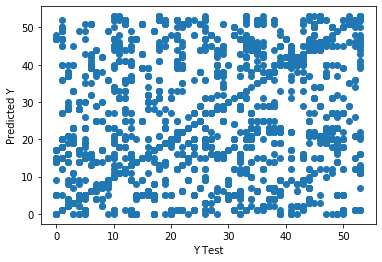

In [200]:
plt.scatter(y_test,pred2)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [205]:
import pickle

with open('LR_region','wb') as files:
    pickle.dump(LR, files)